# Super Predictor Of Indian Premier League (IPL)

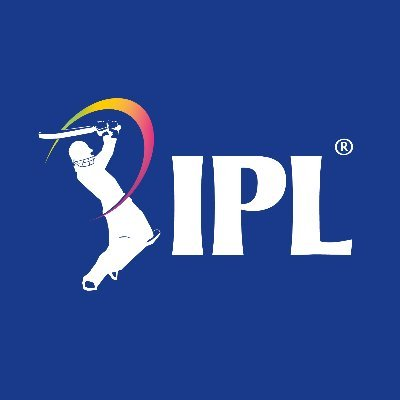

## Description:
Since the dawn of the IPL in 2008, it has attracted viewers all around the globe.
A high level of uncertainty and last moment nail biters has drawn the fans to watch the matches in large numbers.
Within a short period, IPL has become the highest revenue-generating league of cricket.
With all this, the amount of data being generated in terms of matches revenue scores, etc has also become huge.
Analyzing such vast amounts of data would give great insights in forecasting match results, top scores, and wicket-takers, etc. 

## Expected Solution:

The objective of this solution is to create a dashboard that visualizes the following capabilities and also forecast the future results

1. To find the team that won the most number of matches in the entire IPL.

2. To find the team that lost the most number of matches in the entire IPL.

3. Does winning a toss increase the chances of victory.

4. To find the player with the most player of the match awards.

5. To find the city that hosted the maximum number of IPL matches.

6. To find the most winning team for each season.

7. To find the on-field umpire with the maximum number of IPL matches.

8. To find the biggest victories in IPL while defending a total and while chasing a total.

9. Which team won the most matches while batting first

10. Which team won the most matches while batting second

11. List of teams which have won matches by most runs cumulatively

## Analysis and Pre-processing of data done in Jupyter Notebook

### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Virender Sharma,S Ravi,NaN


In [4]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Dropping unnecessary columns

Based on the given problem statements it can be easily observed that the following columns arent necessary - id, data, dl_applied, venue, umpire3

In [5]:
df.drop(['id', 'date', 'dl_applied', 'venue', 'umpire3'], axis = 1, inplace = True)

In [6]:
df.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,NJ Llong
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,A Nand Kishore,S Ravi
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,CK Nandan
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,Virender Sharma,S Ravi


### Handling of missing values

#### Applying heatmap

A heatmap is plotted to observe various null values and thus it is accounted for.

<AxesSubplot:>

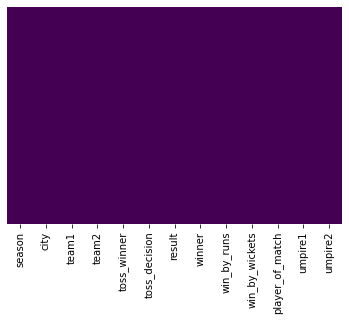

In [7]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


Below function is applied to find out entire count of NaN values.

In [8]:
df.isna().sum().sum()

0

It can be observed that few of the values are missing in city, umpire1 and umpire2.
Those values are manually searched for agains dates when the matches were held and filled.

The empty spaces are filled with details gathered from ESPN cricket matches articles.

### Important Note:
Here Bengaluru and Bangalore are present resulting to same location but different names. Similary it is for Sundaram Ravi and S Ravi. These two values are handled

### Correlation Map

<AxesSubplot:>

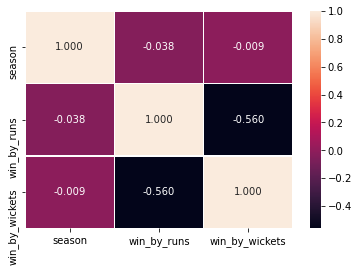

In [9]:
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, fmt = '.3f')

# Data is ready. Now let us graphically understand the data and address each and every problem statement

# 1) To find the team that won the most number of matches in the entire IPL.

Text(0, 0.5, 'No of Matches Won')

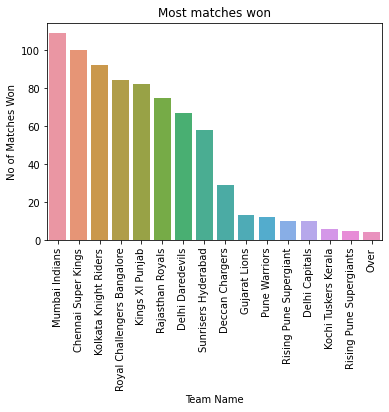

In [12]:
#Let us plot some graphs to understand this problem statement

sns.countplot(x = 'winner', data = df, order = df['winner'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Most matches won')
plt.xlabel('Team Name')
plt.ylabel('No of Matches Won')

Text(0, 0.5, 'No of Matches Won')

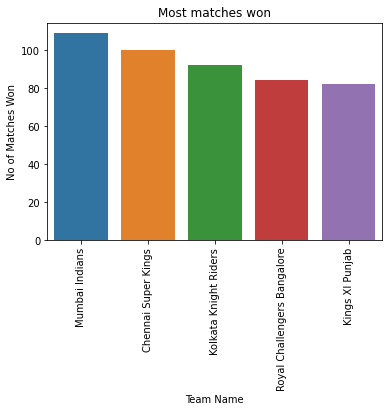

In [13]:
# So now let us see the first 5 teams that has won the most no of competition

sns.countplot(x = 'winner', data = df, order = df['winner'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Most matches won')
plt.xlabel('Team Name')
plt.ylabel('No of Matches Won')

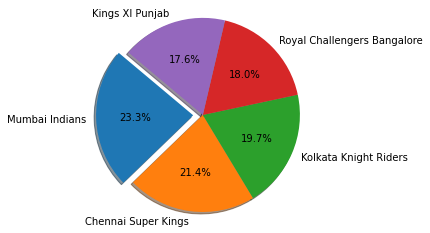

In [14]:
mostWins = dict(df['winner'].value_counts())

labels = []
sizes = []

for x, y in mostWins.items():
    labels.append(x)
    sizes.append(y)
explode = (0.1, 0, 0, 0, 0)
plt.pie(sizes[:5], labels=labels[:5], autopct='%.1f%%', explode=explode, shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [15]:
df_mostWins = pd.DataFrame.from_dict(data = mostWins, orient = 'index', columns = ['No.of Wins'])
df_mostWins

,No.of Wins
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29
Gujarat Lions,13


## 2.To find the team that lost the most number of matches in the entire IPL.

As it can be observed the data is directly not given in the csv file.  So let us create a column for losers and apply a function to fill the value by comparing team1, team2 info across winners, to get the losers value

In [16]:
#Creating a function that will handle return losing team values to the csv file

def loser(cols):
    team1 = cols[0]
    team2 = cols[1]
    winner = cols[2]
    
    if team1 != winner:
        return team1
    if team2 != winner:
        return team2

In [19]:
#Let us create a empty column and apply the function to get the values.

df['loser'] = ""
df['loser'] = df[['team1', 'team2', 'winner']].apply(loser, axis = 1)

In [20]:
df.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,loser
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,NJ Llong,Royal Challengers Bangalore
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,A Nand Kishore,S Ravi,Mumbai Indians
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,CK Nandan,Gujarat Lions
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin,Rising Pune Supergiant
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,Virender Sharma,S Ravi,Delhi Daredevils


In [21]:
#Let us recheck count of missing values. Just for reconfirmation

df.isna().sum().sum()

0

Text(0, 0.5, 'No of Matches Lost')

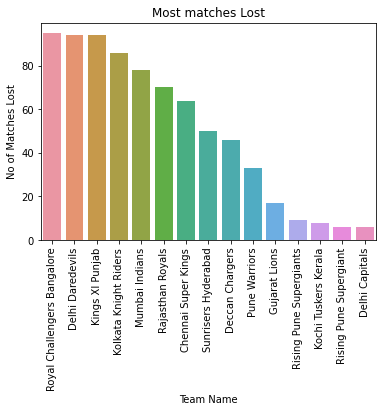

In [22]:
#Let us plot some graphs to understand this problem statement

sns.countplot(x = 'loser', data = df, order = df['loser'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Most matches Lost')
plt.xlabel('Team Name')
plt.ylabel('No of Matches Lost')

Text(0, 0.5, 'No of Matches Lost')

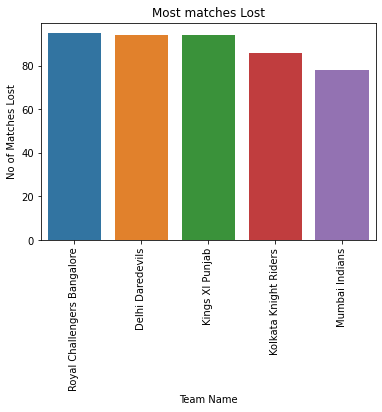

In [23]:
# So now let us see the first 5 teams that has won the most no of competition

sns.countplot(x = 'loser', data = df, order = df['loser'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Most matches Lost')
plt.xlabel('Team Name')
plt.ylabel('No of Matches Lost')

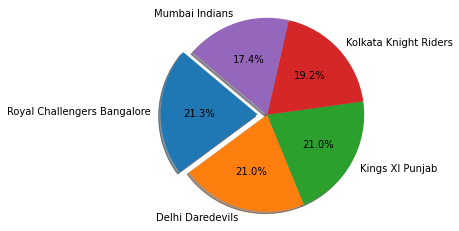

In [24]:
mostloss = dict(df['loser'].value_counts())

labels_loss = []
sizes_loss = []

for x, y in mostloss.items():
    labels_loss.append(x)
    sizes_loss.append(y)

plt.pie(sizes_loss[:5], labels=labels_loss[:5], autopct='%.1f%%', explode= (0.1,0,0,0,0), shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [25]:
df_mostloss = pd.DataFrame.from_dict(data = mostloss, orient = 'index', columns = ['No.of Losses'])
df_mostloss

,No.of Losses
Royal Challengers Bangalore,95
Delhi Daredevils,94
Kings XI Punjab,94
Kolkata Knight Riders,86
Mumbai Indians,78
Rajasthan Royals,70
Chennai Super Kings,64
Sunrisers Hyderabad,50
Deccan Chargers,46
Pune Warriors,33


# 3. Does winning a toss increase the chances of victory.

Let us plot two graphs to see the trend of match wins related to toss wins

1. `Teams that won both the toss and match` 
We will use the data of winner and toss_winner column to find the solution

2. `Most no of toss wins against most no match wins`
We will create a dataframe with these two values of all team against their values and then plot to see its trend.

In [26]:
#This function is to identify the teams that has won both the match and the toss.

def tossMatch(cols):
    winner = cols[0]
    toss_winner = cols[1]
    
    
    if toss_winner == winner:
        return winner

In [27]:
df['toss/win'] = ""
df['toss/win'] = df[['winner', 'toss_winner']].apply(tossMatch, axis = 1)

In [28]:
df.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,umpire1,umpire2,loser,toss/win
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,AY Dandekar,NJ Llong,Royal Challengers Bangalore,None
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,A Nand Kishore,S Ravi,Mumbai Indians,Rising Pune Supergiant
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Nitin Menon,CK Nandan,Gujarat Lions,Kolkata Knight Riders
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,AK Chaudhary,C Shamshuddin,Rising Pune Supergiant,Kings XI Punjab
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,Virender Sharma,S Ravi,Delhi Daredevils,Royal Challengers Bangalore


In [29]:
tosswin = dict(df['toss/win'].value_counts())
tosswin

{'Chennai Super Kings': 57,
 'Mumbai Indians': 56,
 'Kolkata Knight Riders': 53,
 'Rajasthan Royals': 42,
 'Royal Challengers Bangalore': 41,
 'Delhi Daredevils': 35,
 'Kings XI Punjab': 35,
 'Sunrisers Hyderabad': 23,
 'Deccan Chargers': 19,
 'Gujarat Lions': 10,
 'Delhi Capitals': 7,
 'Rising Pune Supergiant': 5,
 'Kochi Tuskers Kerala': 4,
 'Pune Warriors': 3,
 'Rising Pune Supergiants': 3}

Text(0, 0.5, 'Won both Toss and Match')

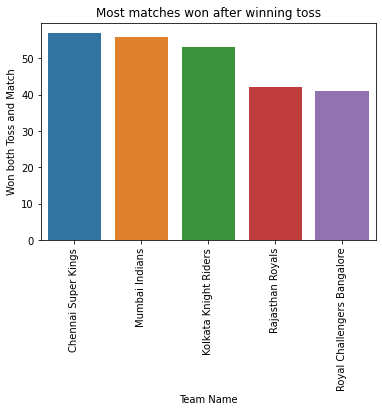

In [30]:
sns.countplot(x = 'toss/win', data = df, order = df['toss/win'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Most matches won after winning toss')
plt.xlabel('Team Name')
plt.ylabel('Won both Toss and Match')

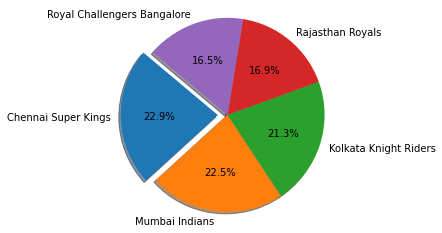

In [31]:
labels_tw = []
sizes_tw = []

for x, y in tosswin.items():
    labels_tw.append(x)
    sizes_tw.append(y)

plt.pie(sizes_tw[:5], labels=labels_tw[:5], autopct='%.1f%%', explode= (0.1,0,0,0,0), shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [32]:
#Let us merge the required datas i.e, mostWins, mostLoss, tosswin to create the new required dataframe

df_mtm = pd.DataFrame.from_dict(data = [mostWins,tosswin,mostloss]).T
df_mtm.columns = ['Wins', 'Tosswins', 'Loss']

In [33]:
df_mtm

,Wins,Tosswins,Loss
Mumbai Indians,109.0,56.0,78.0
Chennai Super Kings,100.0,57.0,64.0
Kolkata Knight Riders,92.0,53.0,86.0
Royal Challengers Bangalore,84.0,41.0,95.0
Kings XI Punjab,82.0,35.0,94.0
Rajasthan Royals,75.0,42.0,70.0
Delhi Daredevils,67.0,35.0,94.0
Sunrisers Hyderabad,58.0,23.0,50.0
Deccan Chargers,29.0,19.0,46.0
Gujarat Lions,13.0,10.0,17.0


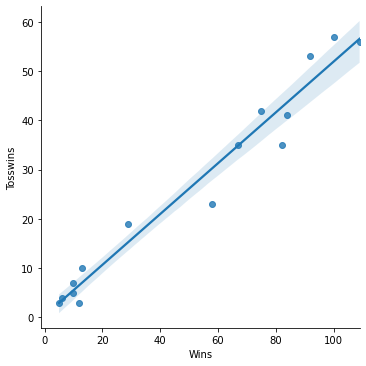

In [34]:
sns.lmplot(x = 'Wins', y = 'Tosswins', data = df_mtm)

#### Observations:
It can be observed that the relationship seems to be fairly linear. Thus it can be concluded that more toss wins increases winning chances

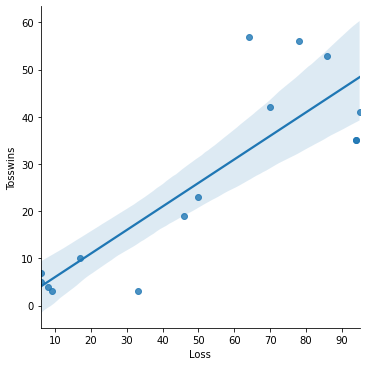

In [35]:
#Plotting Loss against Tosswins

sns.lmplot(x = 'Loss', y = 'Tosswins', data = df_mtm)

#### Observations:
It can be observed that the relationship seems to have too many outliers.
The distance between data points and linear regression seems to be high too.

### OUTPUT:
It can be said from the following two graphs that the winning of a toss matters.

# 4. To find the player with the most player of the match awards.


Text(0, 0.5, 'No of Player of Match Awards')

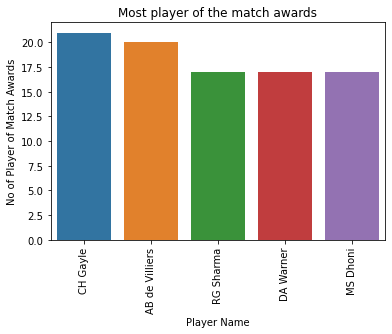

In [36]:
sns.countplot(x = 'player_of_match', data = df, order = df['player_of_match'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Most player of the match awards')
plt.xlabel('Player Name')
plt.ylabel('No of Player of Match Awards')

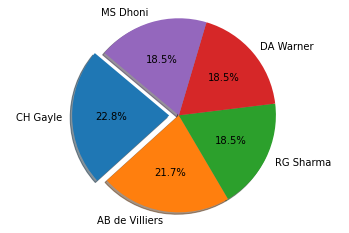

In [37]:
mom = dict(df['player_of_match'].value_counts())

labels_mom = []
sizes_mom = []

for x, y in mom.items():
    labels_mom.append(x)
    sizes_mom.append(y)

plt.pie(sizes_mom[:5], labels=labels_mom[:5], autopct='%.1f%%', explode= (0.1,0,0,0,0), shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# 5. To find the city that hosted the maximum number of IPL matches.

Text(0, 0.5, 'No of matches hosted')

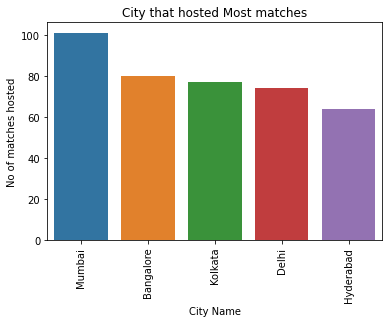

In [38]:
sns.countplot(x = 'city', data = df, order = df['city'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('City that hosted Most matches')
plt.xlabel('City Name')
plt.ylabel('No of matches hosted')

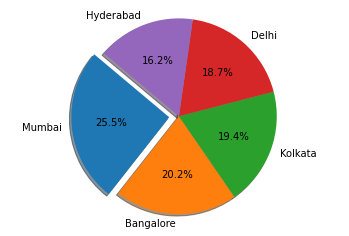

In [39]:
city = dict(df['city'].value_counts())

labels_city = []
sizes_city = []

for x, y in city.items():
    labels_city.append(x)
    sizes_city.append(y)

plt.pie(sizes_city[:5], labels=labels_city[:5], autopct='%.1f%%', explode= (0.1,0,0,0,0), shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# 6. To find the most winning team for each season.

First let us observe each teams total wins - season wise

In [40]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

In [41]:
df.loc[df['season'] == 2008, ['winner']].value_counts()

winner                     
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Daredevils                7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
dtype: int64

In [42]:
df.loc[df['season'] == 2009, ['winner']].value_counts()

winner                     
Delhi Daredevils               10
Deccan Chargers                 9
Royal Challengers Bangalore     9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
dtype: int64

In [43]:
df.loc[df['season'] == 2010, ['winner']].value_counts()

winner                     
Mumbai Indians                 11
Chennai Super Kings             9
Deccan Chargers                 8
Royal Challengers Bangalore     8
Delhi Daredevils                7
Kolkata Knight Riders           7
Rajasthan Royals                6
Kings XI Punjab                 4
dtype: int64

In [44]:
df.loc[df['season'] == 2011, ['winner']].value_counts()

winner                     
Chennai Super Kings            11
Mumbai Indians                 10
Royal Challengers Bangalore    10
Kolkata Knight Riders           8
Kings XI Punjab                 7
Deccan Chargers                 6
Kochi Tuskers Kerala            6
Rajasthan Royals                6
Delhi Daredevils                4
Pune Warriors                   4
Over                            1
dtype: int64

In [45]:
df.loc[df['season'] == 2012, ['winner']].value_counts()

winner                     
Kolkata Knight Riders          12
Delhi Daredevils               11
Chennai Super Kings            10
Mumbai Indians                 10
Kings XI Punjab                 8
Royal Challengers Bangalore     8
Rajasthan Royals                7
Deccan Chargers                 4
Pune Warriors                   4
dtype: int64

In [46]:
df.loc[df['season'] == 2013, ['winner']].value_counts()

winner                     
Mumbai Indians                 13
Chennai Super Kings            12
Rajasthan Royals               11
Sunrisers Hyderabad            10
Royal Challengers Bangalore     9
Kings XI Punjab                 8
Kolkata Knight Riders           6
Pune Warriors                   4
Delhi Daredevils                3
dtype: int64

In [47]:
df.loc[df['season'] == 2014, ['winner']].value_counts()

winner                     
Kings XI Punjab                12
Kolkata Knight Riders          11
Chennai Super Kings            10
Mumbai Indians                  7
Rajasthan Royals                7
Sunrisers Hyderabad             6
Royal Challengers Bangalore     5
Delhi Daredevils                2
dtype: int64

In [48]:
df.loc[df['season'] == 2015, ['winner']].value_counts()

winner                     
Chennai Super Kings            10
Mumbai Indians                 10
Royal Challengers Bangalore     8
Kolkata Knight Riders           7
Rajasthan Royals                7
Sunrisers Hyderabad             7
Delhi Daredevils                5
Kings XI Punjab                 3
Over                            2
dtype: int64

In [49]:
df.loc[df['season'] == 2016, ['winner']].value_counts()

winner                     
Sunrisers Hyderabad            11
Gujarat Lions                   9
Royal Challengers Bangalore     9
Kolkata Knight Riders           8
Delhi Daredevils                7
Mumbai Indians                  7
Rising Pune Supergiants         5
Kings XI Punjab                 4
dtype: int64

In [50]:
df.loc[df['season'] == 2017, ['winner']].value_counts()

winner                     
Mumbai Indians                 12
Rising Pune Supergiant         10
Kolkata Knight Riders           9
Sunrisers Hyderabad             8
Kings XI Punjab                 7
Delhi Daredevils                6
Gujarat Lions                   4
Royal Challengers Bangalore     3
dtype: int64

In [51]:
df.loc[df['season'] == 2018, ['winner']].value_counts()

winner                     
Chennai Super Kings            11
Sunrisers Hyderabad            10
Kolkata Knight Riders           9
Rajasthan Royals                7
Kings XI Punjab                 6
Mumbai Indians                  6
Royal Challengers Bangalore     6
Delhi Daredevils                5
dtype: int64

In [52]:
df.loc[df['season'] == 2019, ['winner']].value_counts()

winner                     
Mumbai Indians                 11
Chennai Super Kings            10
Delhi Capitals                 10
Kings XI Punjab                 6
Kolkata Knight Riders           6
Sunrisers Hyderabad             6
Rajasthan Royals                5
Royal Challengers Bangalore     5
Over                            1
dtype: int64

#### From the above data a seperate dataframe with each team wise winning is created and a seperate plot is plotted"

In [53]:
season = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
teams = ['Delhi Daredevils', 'Delhi Daredevils','Mumbai Indians', 'Chennai Super Kings', 
         'Kolkata Knight Riders', 'Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings', 'Sunrisers Hyderabad', 
         'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians']
count_wins = [10, 10, 11, 11, 12, 13, 12, 10, 11, 12, 11, 11]

df_prob6 = pd.DataFrame(list(zip(season, teams, count_wins)), columns = ['season', 'teams', 'wins'])

In [54]:
df_prob6

,season,teams,wins
0,2008,Delhi Daredevils,10
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


# 7. To find the on-field umpire with the maximum number of IPL matches.

### First lets oberve the count for umpire1 data

Text(0, 0.5, 'No of Matches')

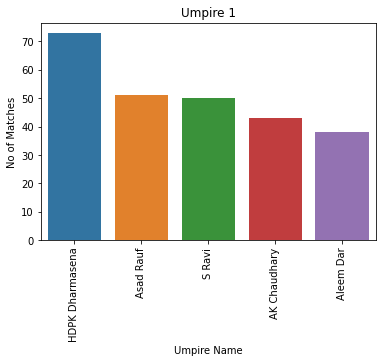

In [55]:
sns.countplot(x = 'umpire1', data = df, order = df['umpire1'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Umpire 1')
plt.xlabel('Umpire Name')
plt.ylabel('No of Matches')

### Now lets oberve the count for umpire2 data

Text(0, 0.5, 'No of Matches')

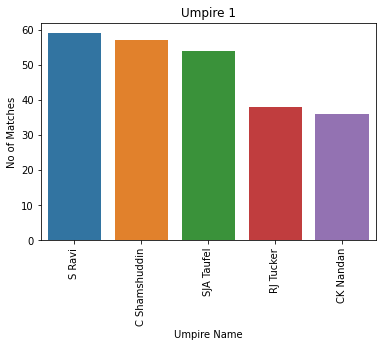

In [56]:
sns.countplot(x = 'umpire2', data = df, order = df['umpire2'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Umpire 1')
plt.xlabel('Umpire Name')
plt.ylabel('No of Matches')

#### Conclusion:
In the both plots `S Ravi` name is common. Thus he is the umpire with most no of on field umpiring for matches.

# 8. To find the biggest victories in IPL while defending a total and while chasing a total.

Two plots need to be plotted.
1. Biggest victory while defending a total.
2. Biggest victory while chasing a total.

#### 1. Biggest victory while defending a total.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

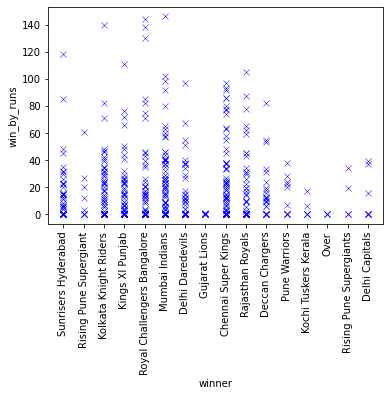

In [57]:
sns.scatterplot(x = 'winner', y='win_by_runs', data = df, marker = 'x', color = 'blue')
plt.xticks(rotation = 90)

By seeing the above plot it can be understood that the Mumbai Indians has the highest biggest victory while defending a total.
The below values is win by runs for Mumbai Indians.

In [58]:
df['win_by_runs'].max()

146

#### 2. Biggest victory while chasing a total.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

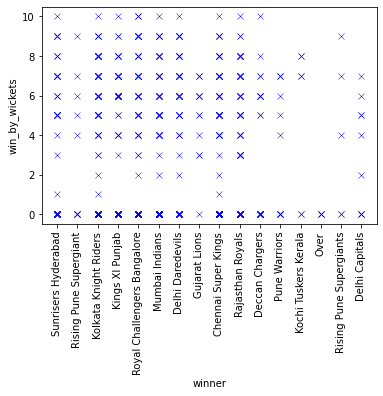

In [59]:
sns.scatterplot(x = 'winner', y='win_by_wickets', data = df, marker = 'x', color = 'blue')
plt.xticks(rotation = 90)

From the above graph the biggest victory while chasing a total can be found out. Every team has atleast one match with win by wickets as zero. Least number of wickets is what is necessary for biggest victory.

# 9. Which team won the most matches while batting first.

We need to add a column to find out which team won while batting first so we find out it by using below functions and perform necessary operations

In [60]:
def winBat(cols):
    winner = cols[0]
    toss_winner = cols[1]
    toss_decision = cols[2]
    
    if winner == toss_winner:
        if toss_decision == 'bat':
            return winner
    else:
        if toss_decision == 'field':
            return winner

In [61]:
df['batfirst'] = ""
df['batfirst'] = df[['winner', 'toss_winner', 'toss_decision']].apply(winBat, axis = 1)

Text(0, 0.5, 'No of Matches Won')

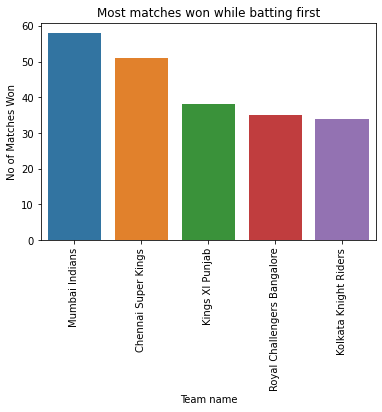

In [62]:
sns.countplot(x = 'batfirst', data = df, order = df['batfirst'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Most matches won while batting first')
plt.xlabel('Team name')
plt.ylabel('No of Matches Won')

# 10. Which team won the most matches while batting second

We need to add a column to find out which team won while batting second so we find out it by using below functions and perform necessary operations

In [63]:
def winBowl(cols):
    winner = cols[0]
    toss_winner = cols[1]
    toss_decision = cols[2]
    
    if winner == toss_winner:
        if toss_decision == 'field':
            return winner
    else:
        if toss_decision == 'bat':
            return winner

In [64]:
df['batsecond'] = ""
df['batsecond'] = df[['winner', 'toss_winner', 'toss_decision']].apply(winBowl, axis = 1)

Text(0, 0.5, 'No of Matches Won')

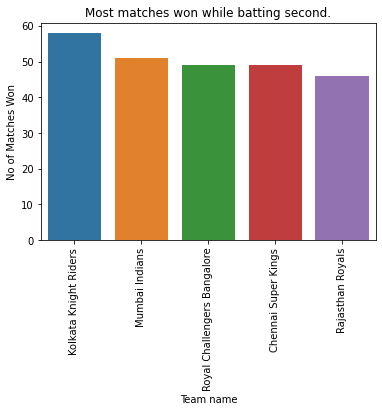

In [65]:
sns.countplot(x = 'batsecond', data = df, order = df['batsecond'].value_counts().iloc[:5].index)
plt.xticks(rotation = 90)
plt.title('Most matches won while batting second.')
plt.xlabel('Team name')
plt.ylabel('No of Matches Won')

# 11. List of teams which have won matches by most runs cumulatively

In [66]:
cumDict = dict(df.groupby('winner')['win_by_runs'].sum())
cumDict

{'Chennai Super Kings': 1778,
 'Deccan Chargers': 421,
 'Delhi Capitals': 92,
 'Delhi Daredevils': 675,
 'Gujarat Lions': 1,
 'Kings XI Punjab': 925,
 'Kochi Tuskers Kerala': 23,
 'Kolkata Knight Riders': 1086,
 'Mumbai Indians': 1866,
 'Over': 0,
 'Pune Warriors': 139,
 'Rajasthan Royals': 895,
 'Rising Pune Supergiant': 123,
 'Rising Pune Supergiants': 53,
 'Royal Challengers Bangalore': 1252,
 'Sunrisers Hyderabad': 713}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Chennai Super Kings'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Delhi Capitals'),
  Text(3, 0, 'Delhi Daredevils'),
  Text(4, 0, 'Gujarat Lions'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kochi Tuskers Kerala'),
  Text(7, 0, 'Kolkata Knight Riders'),
  Text(8, 0, 'Mumbai Indians'),
  Text(9, 0, 'Over'),
  Text(10, 0, 'Pune Warriors'),
  Text(11, 0, 'Rajasthan Royals'),
  Text(12, 0, 'Rising Pune Supergiant'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Royal Challengers Bangalore'),
  Text(15, 0, 'Sunrisers Hyderabad')])

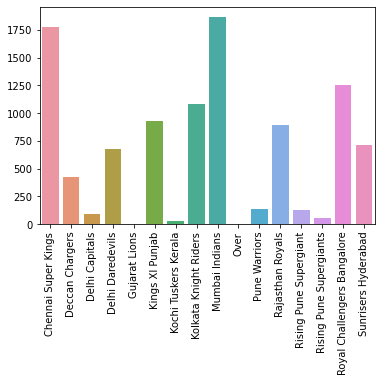

In [67]:
keys = list(cumDict.keys())
vals = [(cumDict[k]) for k in keys]
sns.barplot(x=keys, y=vals)
plt.xticks(rotation = 90)

# SOLUTION:

### 1. To find the team that won the most number of matches in the entire IPL.
##### Answer: Mumbai Indians
### 2. To find the team that lost the most number of matches in the entire IPL.
##### Answer: Royal Challengers Bangalore
### 3. Does winning a toss increase the chances of victory.
##### Answer: The trend observed shows a linear relationship, but there are few outliers too. But it can be concluded that it does increase the chances of victory.
### 4. To find the player with the most player of the match awards.
##### Answer: CH Gayle
### 5. To find the city that hosted the maximum number of IPL matches.
##### Answer: Mumbai
### 6. To find the most winning team for each season.
##### Answer: 
1.  2008-Delhi Daredevils-10
2.	2009-Delhi Daredevils-10
3.	2010-Mumbai Indians-11
4.	2011-Chennai Super Kings-11
5.	2012-Kolkata Knight Riders-12
6.	2013-Mumbai Indians-13
7.	2014-Kings XI Punjab-12
8.	2015-Chennai Super Kings-10
9.	2016-Sunrisers Hyderabad-11
10.	2017-Mumbai Indians-12
11.	2018-Chennai Super Kings-11
12.	2019-Mumbai Indians-11
### 7. To find the on-field umpire with the maximum number of IPL matches.
##### Answer: S Ravi
### 8. To find the biggest victories in IPL while defending a total and while chasing a total.
##### Answer: While chasing a total `Every team has atleast one biggest victory match`
#####                While defending a total `Mumbai Indians by 146 runs`
### 9. Which team won the most matches while batting first
##### Answer: Mumbai Indians
### 10. Which team won the most matches while batting second
##### Answer: Kolkata Knight Riders
### 11. List of teams which have won matches by most runs cumulatively
##### Answer: Mumbai Indians with 1866 Runs

# THAK YOU